## Questions to Answer

- The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

 -   They want you to perform a statistical test to get a mathematically-supported answer.
 - They want you to report if you found a significant difference between ratings.
 - If so, what was the p-value of you analysis?
 - And which rating earns the most revenue?
 - They want you to prepare a visualization that supports your finding.
 - It is then up to you to think of 2 additional hypotheses to test that your stakeholder may want to know.

-  Some example hypotheses you could test:

- Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
- Do movies released in 2020 earn less revenue than movies released in 2018?
- How do the years compare for movie ratings?
- Do some movie genres earn more revenue than others?
- Are some genres higher rated than others?
etc.

### Export Additional Data from 2015 - 2019

In [12]:
import pandas as pd
import json
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb
import os, time

with open('/Users/lauradimaria/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

#TMDB api key
tmdb.API_KEY =  login['api-key']

In [13]:
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0093119,movie,Grizzly II: Revenge,Grizzly II: The Predator,0,2020,NaN,74,"Horror,Music,Thriller"


In [14]:
#Function to add certification to dataset
def movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    for c in releases['countries']:
        if c['iso_3166_1' ] =='US':
            info['certification'] = c['certification']
    return[info]

In [15]:
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.DS_Store',
 'tmdb_api_results_2000.json',
 'final_tmdb_data_2000.csv.gz',
 'tmdb_api_results_2001.json',
 'ratings.csv.gz',
 'title_basics.csv.gz',
 'final_tmdb_data_2000.csv',
 'title_aka.csv.gz',
 'tmdb_api_results_2019.json',
 'final_tmdb_data_2001.csv.gz',
 '.ipynb_checkpoints',
 'tmdb_results_combined.csv.gz',
 'title_basics.csv']

In [16]:
YEARS_TO_GET = [2019, 2018, 2017, 2016, 2015]

In [17]:
def write_json(new_data, filename): 
        """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""    
    
        with open(filename,'r+') as file:
            file_data = json.load(file)
            if (type(new_data) == list) & (type(file_data) == list):
                file_data.extend(new_data)
            else:
                 file_data.append(new_data)
        
            file.seek(0)
            json.dump(file_data, file)

In [18]:
for YEAR in tqdm_notebook(YEARS_TO_GET,desc='YEARS',position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)
    if file_exists == False:
            with open(JSON_FILE,'w') as f:
                json.dump([{'imdb_id':0}],f)
    df = basics.loc[ basics['startYear']==YEAR].copy()
    movie_ids = df['tconst'].copy()
    previous_df = pd.read_json(JSON_FILE)
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
            try:
                temp = movie_with_rating(movie_id)  
                write_json(temp,JSON_FILE)
                time.sleep(0.02)
            except Exception as e:
                continue
            
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/5 [00:00<?, ?it/s]

Movies from 2019:   0%|          | 0/5693 [00:00<?, ?it/s]

Movies from 2018:   0%|          | 0/5649 [00:00<?, ?it/s]

Movies from 2017:   0%|          | 0/5525 [00:00<?, ?it/s]

Movies from 2016:   0%|          | 0/5166 [00:00<?, ?it/s]

Movies from 2015:   0%|          | 0/4940 [00:00<?, ?it/s]

In [55]:
year_2015 = pd.read_csv('/Users/lauradimaria/Desktop/GitHub/CD--Project-3-IMDB-/Data/final_tmdb_data_2015.csv.gz', lineterminator='\n', low_memory = False)
year_2015.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0191476,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,365165.0,ro,Această lehamite,...,0.0,98.0,"[{'english_name': 'Romanian', 'iso_639_1': 'ro...",Released,NaN,Fed Up,0.0,4.4,5.0,NaN


In [56]:
year_2016 = pd.read_csv('/Users/lauradimaria/Desktop/GitHub/CD--Project-3-IMDB-/Data/final_tmdb_data_2016.csv.gz', low_memory = False)
year_2016.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0094859,0.0,NaN,NaN,187.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,431608.0,en,Chief Zabu,...,0.0,74.0,[],Released,An outrageous social comedy about a New York r...,Chief Zabu,0.0,0.0,0.0,NaN


In [57]:
year_2017 = pd.read_csv('/Users/lauradimaria/Desktop/GitHub/CD--Project-3-IMDB-/Data/final_tmdb_data_2017.csv.gz', lineterminator='\n', low_memory = False)
year_2017.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0100275,0.0,/2S2XTeS2b0LPnqzXBDD3ZmwPF2X.jpg,NaN,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,467254.0,es,La telenovela errante,...,0.0,80.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,The Wandering Soap Opera,0.0,6.7,11.0,NaN


In [58]:
year_2018 = pd.read_csv('/Users/lauradimaria/Desktop/GitHub/CD--Project-3-IMDB-/Data/final_tmdb_data_2018.csv.gz', lineterminator='\n', low_memory = False)
year_2018.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0069049,0.0,/zjG95oDnBcFKMPgBEmmuNVOMC90.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}]",https://www.netflix.com/title/80085566,299782.0,en,The Other Side of the Wind,...,0.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,40 years in the making,The Other Side of the Wind,0.0,6.7,156.0,R


In [66]:
year_2019 = pd.read_csv('/Users/lauradimaria/Desktop/GitHub/CD--Project-3-IMDB-/Data/final_tmdb_data_2019.csv.gz', lineterminator='\n', low_memory = False)
year_2019.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0385887,0.0,/xMHeU84wLQ9uH9acJ0oPgdii9wO.jpg,NaN,26000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",https://www.motherlessbrooklynfilm.com,504562.0,en,Motherless Brooklyn,...,18377736.0,145.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Motherless Brooklyn,0.0,6.721,1175.0,R


In [48]:
years_combined = pd.concat([year_2015, year_2016, year_2017, year_2018, year_2019])
years_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21266 entries, 0 to 4707
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                21266 non-null  object 
 1   adult                  21261 non-null  float64
 2   backdrop_path          15279 non-null  object 
 3   belongs_to_collection  1244 non-null   object 
 4   budget                 21261 non-null  float64
 5   genres                 21261 non-null  object 
 6   homepage               5792 non-null   object 
 7   id                     21261 non-null  float64
 8   original_language      21261 non-null  object 
 9   original_title         21261 non-null  object 
 10  overview               20770 non-null  object 
 11  popularity             21261 non-null  float64
 12  poster_path            20384 non-null  object 
 13  production_companies   21261 non-null  object 
 14  production_countries   21261 non-null  object 
 15  rel

In [60]:
#drop rows, reset index
years_combined = years_combined.loc[years_combined['imdb_id']!='0']
years_combined = years_combined.reset_index(drop=True)
years_combined.head(3)

,imdb_id,budget,genres,id,release_date,revenue,runtime,title,certification
0,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13
1,tt0478970,130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",102899.0,2015-07-14,5.193120e+08,117.0,Ant-Man,PG-13
2,tt0810819,15000000.0,"[{'id': 18, 'name': 'Drama'}]",306819.0,2015-01-01,6.419152e+07,119.0,The Danish Girl,R


In [50]:
#drop rows where budget or revenue is 0
years_combined.drop(years_combined.loc[years_combined['revenue'] == 0.0].index, inplace=True)
years_combined.drop(years_combined.loc[years_combined['budget'] == 0.0].index, inplace=True)
years_combined.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0369610,0.0,/yOCRqvrRrxbs5FYq2pX1KtLJwmR.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397.0,en,Jurassic World,...,1.671713e+09,124.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,0.0,6.675,18330.0,PG-13
4,tt0478970,0.0,/a7sAqMKv5tkAdMzFfIhPqIBmQ9g.jpg,"{'id': 422834, 'name': 'Ant-Man Collection', '...",130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/movies/movie/180/ant-man,102899.0,en,Ant-Man,...,5.193120e+08,117.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heroes don't get any bigger.,Ant-Man,0.0,7.087,17352.0,PG-13
7,tt0810819,0.0,/reOdKBPXT9TpwyYnGGyKxG3jXe6.jpg,NaN,15000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,306819.0,en,The Danish Girl,...,6.419152e+07,119.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find the courage to be yourself.,The Danish Girl,0.0,7.620,5247.0,R
8,tt0884732,0.0,/7oX9Sk51Bd7efCzkQ92INHTLx3r.jpg,NaN,23000000.0,"[{'id': 35, 'name': 'Comedy'}]",https://www.sonypictures.com/movies/thewedding...,252838.0,en,The Wedding Ringer,...,7.979988e+07,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,He's the best man... money can buy.,The Wedding Ringer,0.0,6.466,1390.0,R
10,tt1014763,0.0,/sjsaxwNsgBbrWrJIXtCT5DNo9Mt.jpg,NaN,50000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",NaN,181283.0,en,Child 44,...,3.324330e+06,137.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,How do you find a killer who doesn’t exist?,Child 44,0.0,6.261,1408.0,R


In [62]:
cols_to_drop = ['homepage', 'original_language', 'original_title', 
                'spoken_languages', 'status', 'tagline', 'video', 
               'vote_average', 'vote_count', 'backdrop_path', 'belongs_to_collection']
years_combined = years_combined.drop(columns=cols_to_drop)
years_combined.head()

KeyError: "['homepage', 'original_language', 'original_title', 'spoken_languages', 'status', 'tagline', 'video', 'vote_average', 'vote_count', 'backdrop_path', 'belongs_to_collection'] not found in axis"

In [52]:
drop_cols = ['adult', 'overview', 'popularity', 'poster_path', 'production_companies',
             'production_countries']
years_combined = years_combined.drop(columns=drop_cols)
years_combined.head()

,imdb_id,budget,genres,id,release_date,revenue,runtime,title,certification
1,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13
4,tt0478970,130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",102899.0,2015-07-14,5.193120e+08,117.0,Ant-Man,PG-13
7,tt0810819,15000000.0,"[{'id': 18, 'name': 'Drama'}]",306819.0,2015-01-01,6.419152e+07,119.0,The Danish Girl,R
8,tt0884732,23000000.0,"[{'id': 35, 'name': 'Comedy'}]",252838.0,2015-01-16,7.979988e+07,101.0,The Wedding Ringer,R
10,tt1014763,50000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",181283.0,2015-03-15,3.324330e+06,137.0,Child 44,R


In [64]:
#confirm value counts for certification
years_combined['certification'].value_counts()

R        377
PG-13    316
PG       124
NR        41
G         13
NC-17      5
Name: certification, dtype: int64

In [67]:
#genre split column
years_combined['genres_split'] = years_combined['genres'].str.split(',')
years_combined.head(3)

,imdb_id,budget,genres,id,release_date,revenue,runtime,title,certification,genres_split
0,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13,"[[{'id': 28, 'name': 'Action'}, {'id': 12, ..."
1,tt0478970,130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",102899.0,2015-07-14,5.193120e+08,117.0,Ant-Man,PG-13,"[[{'id': 878, 'name': 'Science Fiction'}, {'..."
2,tt0810819,15000000.0,"[{'id': 18, 'name': 'Drama'}]",306819.0,2015-01-01,6.419152e+07,119.0,The Danish Girl,R,"[[{'id': 18, 'name': 'Drama'}]]"


In [78]:
#Use .explode on genres 
#years_combined = years_combined.explode('genres_split')
#years_combined.head()

,imdb_id,budget,genres,id,release_date,revenue,runtime,title,certification,genres_split
0,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13,NaN
0,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13,NaN
0,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13,NaN
0,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13,NaN
0,tt0369610,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397.0,2015-06-06,1.671713e+09,124.0,Jurassic World,PG-13,NaN


I am not sure where I went wrong with trying to seperate the genres column, it did not look like this for the first few parts of this project. I am going to skip the genres column for now in my hypothesis testing and address this issue at a later time.

In [89]:
import seaborn as sns
import numpy as np
import scipy.stats as stats

### Hypothesis Testing

#### Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

<b>Null:</b> There is no significant difference in revenue between the MPAA ratings of films.

<b>Alternative:</b> There is a significant difference in the revenues between films of different MPAA ratings.

<b>Which test is appropriate?</b>

Type of Data? Numeric(revenue)

How many groups/samples? more than 2

Appropriate test? ANOVA/Post Hoc Tukey

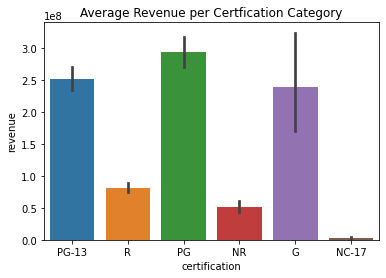

In [90]:
ax = sns.barplot(data=years_combined, x='certification', y='revenue')
ax.set_title('Average Revenue per Certfication Category');

We can easily see that there is a vast difference between MPAA ratings and revenue. We will preform the appropriate test to be sure, and can ignore the assumption of normality based on our sample size.

In [91]:
groups = {}
## Loop through all unique categories
for i in years_combined['certification'].unique():
    ## Get series for group and rename
    data = years_combined.loc[years_combined['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG-13', 'R', nan, 'PG', 'NR', 'G', 'NC-17'])

In [92]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1051: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.